# [perceptron](https://en.wikipedia.org/wiki/Perceptron)
### Abstract
In machine learning, the perceptron is an algorithm for supervised learning of binary classifiers. A binary classifier is a function which can decide whether or not an input, represented by a vector of numbers, belongs to some specific class.It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector.

### Definition
In the modern sense, the perceptron is an algorithm for learning a binary classifier called a threshold function: a function that maps its input $\mathbf {x}$ (a real-valued vector) to an output value $f(x)$ (a single binary value):

\begin{equation}
f(x)=\left \{\begin{matrix}
1 & \text{if}\hspace{0.2cm}\mathbf {w}.\mathbf {x}+b>0
\\ 
0 & otherwise
\end{matrix} \right.
\end{equation}

here $\mathbf {w}$  is a vector of real-valued weights, ${\displaystyle \mathbf {w} \cdot \mathbf {x} }$ is the dot product ${\displaystyle \sum _{i=1}^{m}w_{i}x_{i}}$, where m is the number of inputs to the perceptron, and b is the bias. The bias shifts the decision boundary away from the origin and does not depend on any input value.

The value of $f(\mathbf {x} )$ (0 or 1) is used to classify $\mathbf {x}$  as either a positive or a negative instance, in the case of a binary classification problem. If b is negative, then the weighted combination of inputs must produce a positive value greater than $|b|$ in order to push the classifier neuron over the 0 threshold. Spatially, the bias alters the position (though not the orientation) of the decision boundary. The perceptron learning algorithm does not terminate if the learning set is not linearly separable. If the vectors are not linearly separable learning will never reach a point where all vectors are classified properly. The most famous example of the perceptron's inability to solve problems with linearly nonseparable vectors is the Boolean exclusive-or problem. The solution spaces of decision boundaries for all binary functions and learning behaviors are studied in the reference.

In the context of neural networks, a perceptron is an artificial neuron using the Heaviside step function as the activation function. The perceptron algorithm is also termed the single-layer perceptron, to distinguish it from a multilayer perceptron, which is a misnomer for a more complicated neural network. As a linear classifier, the single-layer perceptron is the simplest feedforward neural network.

## Learning algorithm









>**Perceptron** $((\mathbf{x}_1,\mathbf{y}_1),(\mathbf{x}_2,\mathbf{y}_2),...,(\mathbf{x}_m,\mathbf{y}_m))$
>> initialize $\mathbf {w}^{(1)}=(0,...,0)$
>>> for $i=1,2,...$
>>>>***if*** $\exists i\hspace{0.3cm}s.t \hspace{0.3cm} \mathbf{y}_i\left \langle \mathbf{w}^{(t)},\mathbf{x}_i \right \rangle \leq 0:$
>>>>>$\mathbf{w}^{(t+1)}=\mathbf{w}^{(t)}+\mathbf{y}_i*\mathbf{x}_i$

>>>>***else***
>>>>> **output** $\mathbf{w}^{(t)}$






In the following, you will encounter the implementation of this algorithm on the Jupiter environment.


In [1]:
import numpy as np

import matplotlib.pyplot as plt

**numpy** and **matplotlib** packages imported to the environment.

In [2]:
def exist_function (MM,WW):
    #type(WW)= should be a tupple such as (0,0)
    tmp=False
    for i in range (0,len(MM)):
        if M[i][1][0]*np.dot(WW,M[i][0])<=0:
            return (True,i)
    return (tmp,0)

In the perceptron algorithm, there is an *existential quantifier*.  With the help of this function, we check the presence of such an element and determine the element itself.

In [3]:
def Categorizer (My_Data):
    #We display positive data with Pos and negative data with Neg.
    Pos=[]
    Neg=[]
    for i in range (0, len(My_Data)):
        if float(My_Data[i][1][0])>0:
            Pos.append(My_Data[i][0])
        elif float(My_Data[i][1][0])<0:
            Neg.append(My_Data[i][0])
    return (Pos,Neg)
    

This part of the code is designed for the data **visualization** section. Maybe it would have been better if it was given in the visualization section, but I decided to define all the functions before running the algorithm and just call them later. By the way, it might be better to explain that this function. It reads our training set and then **separates the training set elements based on the labels**.

In [4]:
def WDim_func(SSS):
    #to produce W in dimention of points in traning set
    d_tmp=len(SSS[0][0])
    return [tuple(np.zeros(d_tmp))]
    

Since our data is not necessarily two or three-dimensional, we need to know that we are working with what kind of data to produce a zero vector. This function generates the corresponding zero vector while detecting the dimension number. *This function is called directly in the main algorithm.*

In [5]:
def perceptron_AL(MMM):
    W=WDim_func(MMM)
    ii=0 #ii Is a kind of counter 
    while 1>0:
        K=exist_function(M,W[ii])
        if K[0]==True:
            W.append(W[ii]+np.multiply(M[K[1]][0],M[K[1]][1][0]))
            ii=ii+1
        else:
            #print(W) :I have used this command many times for debugging. 
            return W[ii]

In this part, we see the ***main algorithm***, which we saw its pseudocode in the introduction.

In [6]:
def Pre_plot_2D (ED):
    Pos_x=[]
    Pos_y=[]
    Neg_x=[]
    Neg_y=[]
    for i in range (0,len(ED[0])):
        Pos_x.append(ED[0][i][0])
        Pos_y.append(ED[0][i][1])
    for i in range (0,len(ED[1])):
        Neg_x.append(ED[1][i][0])
        Neg_y.append(ED[1][i][1])
    return (Pos_x,Pos_y,Neg_x,Neg_y)


def Pre_plot_3D (ED):
    Pos_x=[]
    Pos_y=[]
    Neg_x=[]
    Neg_y=[]
    Pos_z=[]
    Neg_z=[]
    for i in range (0,len(ED[0])):
        Pos_x.append(ED[0][i][0])
        Pos_y.append(ED[0][i][1])
        Pos_z.append(ED[0][i][2])
    for i in range (0,len(ED[1])):
        Neg_x.append(ED[1][i][0])
        Neg_y.append(ED[1][i][1])
        Neg_z.append(ED[1][i][2])
    return (Pos_x,Pos_y,Pos_z,Neg_x,Neg_y,Neg_z)
        
def max_min_finder_3dplot(EDD):
    max_x=np.max(Pre_plot_3D (Categorizer(M))[0]+Pre_plot_3D (Categorizer(M))[3])
    min_x=np.min(Pre_plot_3D (Categorizer(M))[0]+Pre_plot_3D (Categorizer(M))[3])
    max_y=np.max(Pre_plot_3D (Categorizer(M))[1]+Pre_plot_3D (Categorizer(M))[4])
    min_y=np.min(Pre_plot_3D (Categorizer(M))[1]+Pre_plot_3D (Categorizer(M))[4])
    return(max_x,min_x,max_y,min_y)

def max_min_finder_2dplot(EDD):
    max_x=np.max(Pre_plot_2D (Categorizer(M))[0]+Pre_plot_2D (Categorizer(M))[2])
    min_x=np.min(Pre_plot_2D (Categorizer(M))[0]+Pre_plot_2D (Categorizer(M))[2])
    max_y=np.max(Pre_plot_2D (Categorizer(M))[1]+Pre_plot_2D (Categorizer(M))[3])
    min_y=np.min(Pre_plot_2D (Categorizer(M))[1]+Pre_plot_2D (Categorizer(M))[3])
    return(max_x,min_x,max_y,min_y)

def line_finder(K):
    return np.true_divide(-K[0],K[1])



As I mentioned before, our data is not necessarily two-dimensional or three-dimensional. But it would be great if we could visualize  2D and 3D data if it is possible. For this purpose, a relatively intelligent code was devised to best represent the data as I knew it. I should note that this code is definitely not optimal and more features can be added to it.
*We need these functions to visualize 2D and 3D data.*


## Algorithm testing on 5D data
In this section, with the help of a for loop, we produce some random data made of 5 dimensions material that a hyperplane can separate. Then we test the algorithm on our random data set. Since the data may accidentally fall on our hyperplane, the size of the training set is unpredictable. Therefore, the size of the data set may be less than expected. You can solve this problem by rerunning the code again.

In [7]:
import numpy.random as rnp
M=[]
Distribution_of_labels=[]
for i in range (0,100):
    tmp=rnp.randint(-9,9, size=5)
    if tmp[0]+tmp[1]+2*tmp[2]-tmp[3]-2*tmp[4]>2:
        print('+',end=" ") 
        M.append([tmp,[+1]])
        Distribution_of_labels.append(+1)
    elif tmp[0]+tmp[1]+2*tmp[2]-tmp[3]-2*tmp[4]<-2:
        print('-',end=" ")
        M.append([tmp,[-1]])
        Distribution_of_labels.append(-1)
    else:
        print("O",end=" ") #we missed a point
    
        

- - + + - + + + O - - - - - - - - + + - - - + + + + + - + + - - + - + + O + - + - + - + + + - - - - + O - + + - + + - O - - + O + - + + - O + - - - O - - + - O + + - + + - - + - O - - + - - - - - - - 

The following diagram is drawn based on the distribution of randomly generated labels to see the visualized distribution of the labels.

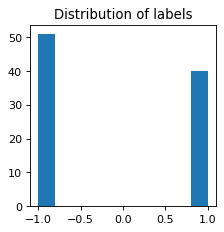

In [8]:
plt.figure(figsize=(3, 3), dpi=80)
plt.hist(Distribution_of_labels)
plt.title('Distribution of labels')
plt.show()

In [9]:
perceptron_AL(M)

array([  7.,  11.,  26., -10., -21.])

The above vector is the **normal vector** of the hyperplane that separates our data.

## Run the algorithm on two-dimensional and three-dimensional data
>Like we did for 5D data, we do this to generate 2D random data.

In [10]:
import numpy.random as rnp
M=[]
Distribution_of_labels=[]
for i in range (0,100):
    tmp=rnp.randint(-9,9, size=2)
    if tmp[0]-2*tmp[1]>2:
        print('+',end=" ") 
        M.append([tmp,[+1]])
        Distribution_of_labels.append(+1)
    elif tmp[0]-2*tmp[1]<-2:
        print('-',end=" ")
        M.append([tmp,[-1]])
        Distribution_of_labels.append(-1)
    else:
        print("O",end=" ") #we missed a point
    
        

- - + - + + - + - O + + O + - - + - - - + - + - + - - - + + + + + + O O O - - - - - - - + - + + - + + + + + + + - + + - + - + + - - - + - - O - + - - - + - + O + - + - - - - - - + - - + + - - + - + + 

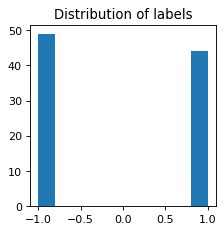

In [11]:
plt.figure(figsize=(3, 3), dpi=80)
plt.hist(Distribution_of_labels)
plt.title('Distribution of labels')
plt.show()

The data is then plotted on a Cartesian coordinate, and you can see the result of the whole process in a two-dimensional diagram. In addition, you can also view the vector perpendicular to the separator line as the output of the algorithm.

In [12]:
perceptron_AL(M)

array([ 1., -3.])

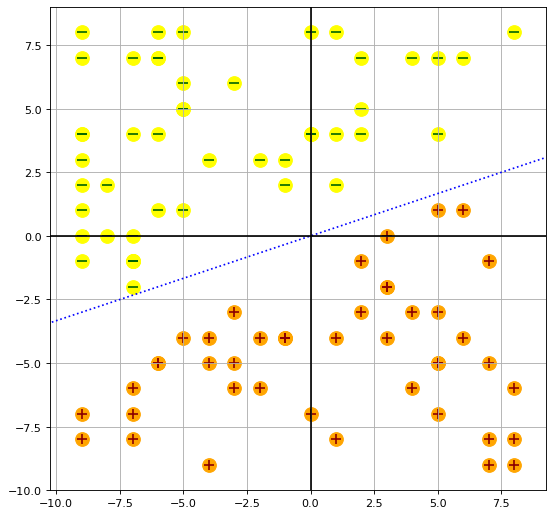

In [13]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(8, 8), dpi=80)
plt.scatter(Pre_plot_2D (Categorizer(M))[0],Pre_plot_2D (Categorizer(M))[1],marker='o',s=150,c='orange')
plt.scatter(Pre_plot_2D (Categorizer(M))[0],Pre_plot_2D (Categorizer(M))[1],marker='+',s=80,c='darkred')
plt.scatter(Pre_plot_2D (Categorizer(M))[2],Pre_plot_2D (Categorizer(M))[3],marker="o",s=150,c='yellow')
plt.scatter(Pre_plot_2D (Categorizer(M))[2],Pre_plot_2D (Categorizer(M))[3],marker="_",s=80,c='darkgreen')
plt.grid(True)
max_of_x=max_min_finder_2dplot(Pre_plot_2D (Categorizer(M)))[0]
min_of_x=max_min_finder_2dplot(Pre_plot_2D (Categorizer(M)))[1]
max_of_y=max_min_finder_2dplot(Pre_plot_2D (Categorizer(M)))[2]
min_of_y=max_min_finder_2dplot(Pre_plot_2D (Categorizer(M)))[3]
plt.plot([min_of_x-2,max_of_x+2],[np.multiply(min_of_x-2,line_finder(perceptron_AL(M))),np.multiply(max_of_x+2,line_finder(perceptron_AL(M)))],ls=':',c='blue')
ax.axhline(y=0, color='black')
ax.axvline(x=0, color='black')
plt.axis('equal')
plt.xlim([min_of_x-1,max_of_x+1])
plt.ylim([min_of_y-1,max_of_y+1])
plt.show()

## 3-D data
We repeat all the above steps for 3D data

In [14]:
import numpy.random as rnp
M=[]
Distribution_of_labels=[]
for i in range (0,120):
    tmp=rnp.randint(-9,9, size=3)
    if tmp[0]-2*tmp[1]+tmp[2]>2.5:
        print('+',end=" ") 
        M.append([tmp,[+1]])
        Distribution_of_labels.append(+1)
    elif tmp[0]-2*tmp[1]+tmp[2]<-2.5:
        print('-',end=" ")
        M.append([tmp,[-1]])
        Distribution_of_labels.append(-1)
    else:
        print("O",end=" ") #we missed a point
    

O + + - - - - + - O - - + + + + - + - + + + - - + + + O - - + + - + - - - - - O O + O - + O - O + - + - - + + - - - + O + - O - + O - - + + - + O O O + + + + O - - - + + - - + - - + + - + - - + + + - + O - - O O - O + - - - + O O - + + - - 

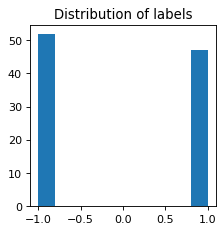

In [15]:
plt.figure(figsize=(3, 3), dpi=80)
plt.hist(Distribution_of_labels)
plt.title('Distribution of labels')
plt.show()

In [16]:
perceptron_AL(M)

array([  9., -20.,   9.])

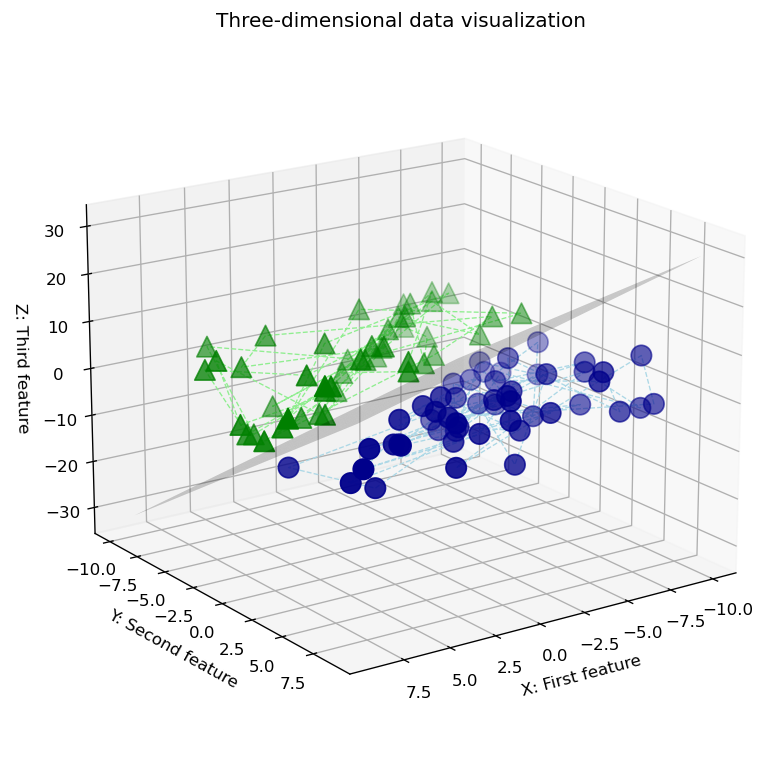

In [17]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure(figsize=(8, 8), dpi=120)
ax = fig.add_subplot(111, projection='3d')

x =Pre_plot_3D (Categorizer(M))[0]
y =Pre_plot_3D (Categorizer(M))[1]
z =Pre_plot_3D (Categorizer(M))[2]



ax.scatter(x, y, z, c='green',s=150, marker='^')
ax.plot(x, y, z, c='lightgreen',ls='--', lw=0.8) # you can desable this part of code its just for better visualization

x2 =Pre_plot_3D (Categorizer(M))[3]
y2 =Pre_plot_3D (Categorizer(M))[4]
z2 =Pre_plot_3D (Categorizer(M))[5]

xx, yy = np.meshgrid(range(-10,10), range(-10,10))
z = ( -1*perceptron_AL(M)[0]*xx - perceptron_AL(M)[1]*yy) / (perceptron_AL(M)[2])
ax.plot_surface(xx, yy, z, alpha=0.2,color='black')

ax.scatter(x2, y2, z2, c='darkblue' ,s=150 , marker='o')
ax.plot(x2, y2, z2, c='lightblue',ls='--', lw=0.8) # you can desable this part of code its just for better visualization

ax.set_xlabel('X: First feature')
ax.set_ylabel('Y: Second feature')
ax.set_zlabel('Z: Third feature')
plt.title('Three-dimensional data visualization')
ax.view_init(18, 55)
plt.show()